In [2]:
install.packages("readr", repos='http://cran.us.r-project.org')

also installing the dependencies 'Rcpp', 'curl'



package 'Rcpp' successfully unpacked and MD5 sums checked
package 'curl' successfully unpacked and MD5 sums checked
package 'readr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Bryan\AppData\Local\Temp\RtmpYHQgi3\downloaded_packages


Time to switch to .csv files! Similar to utils, the read_csv() in the readr package uses read_delim() behind the scenes. If you use read_csv(), however, you are not free to choose the delim argument; readr handles that for you.

Instead of a .txt, the potatoes data comes to you in the form of a .csv file. It uses commas to delimit fields in a record, but does not contain the column names in the first row anymore. The file potatoes.csv is available in your workspace. You'll have to specify the column names manually; you can use the properties variable that's already pre-coded.

## read_csv
Import "potatoes.csv" using read_csv(). Assign the properties vector to the col_names argument. Name the resulting data frame potatoes.


In [7]:
# readr is already loaded
library(readr)
# Column names
properties <- c("area", "temp", "size", "storage", "method", 
                "texture", "flavor", "moistness")

# Import potatoes.csv with read_csv(): potatoes
potatoes<- read_csv("D:/Data/potatoes.csv", col_names=properties)

Create a copy of potatoes, potatoes2.

In [9]:
# Create a copy of potatoes: potatoes2
potatoes2<-potatoes

Turn the method column of potatoes2 into a factor with the factor() function.

In [11]:
# Convert the method column of potatoes2 to a factor
potatoes2$method<-as.factor(potatoes2$method)
str(potatoes2)

Classes 'tbl_df', 'tbl' and 'data.frame':	160 obs. of  8 variables:
 $ area     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ temp     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ size     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ storage  : int  1 1 1 1 1 2 2 2 2 2 ...
 $ method   : Factor w/ 5 levels "1","2","3","4",..: 1 2 3 4 5 1 2 3 4 5 ...
 $ texture  : num  2.9 2.3 2.5 2.1 1.9 1.8 2.6 3 2.2 2 ...
 $ flavor   : num  3.2 2.5 2.8 2.9 2.8 3 3.1 3 3.2 2.8 ...
 $ moistness: num  3 2.6 2.8 2.4 2.2 1.7 2.4 2.9 2.5 1.9 ...


## col_types, skip and n_max

Apart from controlling how columns are named, you can also specify which types the columns should be in your imported data frame. You can do this with col_types. If set to NULL, which is the default, functions from the readr package will try to find the correct types themselves. If you want to manually set the types, you can use a string between "", with one character for each column that is imported. Each character corresponds to a type:

c to a character

d to a double

i to an integer

l to a logical

_ skips the column

But that's not all: 

Through skip and n_max, which should be set to integers, you can also control which part of your flat file you're actually importing into R. It's important here that once you skip some lines, this inevitably leads to also skipping the column names in the first line, if they are available. n_max will be the maximum number of records to read.

You'll be working with the potatoes.txt data frame again. It contains tab-delimited records and the first line contains the column names. For change, use read_tsv() this time; it's a wrapper around read_delim() that's easy to use for tab-delimited files. The column names are available as the properties vector; if you think you should need them.

Use read_tsv() to import observations 7, 8, 9, 10 and 11 from potatoes.txt. Make sure that the columns have the appropriate names. Store the result in potatoes_fragment.

In [13]:
# readr is already loaded
library(readr)
# Column names
properties <- c("area", "temp", "size", "storage", "method", 
                "texture", "flavor", "moistness")

# Import 5 observations from potatoes.txt: potatoes_fragment
potatoes_fragment <-read_tsv("D:/Data/potatoes.txt", skip=7, n_max=5, col_names=properties)

Use read_tsv() once more, this time importing all data. Use the col_types argument to import all columns as characters. Store the resulting data frame in potatoes_char.

In [15]:
# Import all data, but force all columns to be character: potatoes_char
potatoes_char<- read_tsv("D:/Data/potatoes.txt", col_types="cccccccc")

Display the structure of potatoes_char with str().

In [16]:
# Display the structure of potatoes_char
str(potatoes_char)

Classes 'tbl_df', 'tbl' and 'data.frame':	160 obs. of  8 variables:
 $ area     : chr  "1" "1" "1" "1" ...
 $ temp     : chr  "1" "1" "1" "1" ...
 $ size     : chr  "1" "1" "1" "1" ...
 $ storage  : chr  "1" "1" "1" "1" ...
 $ method   : chr  "1" "2" "3" "4" ...
 $ texture  : chr  "2.9" "2.3" "2.5" "2.1" ...
 $ flavor   : chr  "3.2" "2.5" "2.8" "2.9" ...
 $ moistness: chr  "3.0" "2.6" "2.8" "2.4" ...


## col_types with collectors

As Filip mentioned in the video, another way of setting the types of the imported columns is using collectors. Collector functions can be passed in a list() to the col_types argument of read_ functions to tell them how to interpret values in a column.

For a complete list of collector functions, you can take a look at the collector documentation. For this exercise you will need two collector functions:

col_integer(): the column should be interpreted as an integer

col_factor(levels, ordered = FALSE): the column should be interpreted as a factor with levels. By default, the values are not seen as ordered values.

In this exercise, you will work with hotdogs.txt, which is a tab-delimited file without column names in the first row.

hotdogs is created for you without setting the column types, inspect its summary using the summary() function.

In [17]:
# readr is already loaded
library(readr)

# Import without col_types
hotdogs <- read_tsv("D:/Data/hotdogs.txt", col_names = c("type", "calories", "sodium"))

In [18]:
# Display the summary of hotdogs
summary(hotdogs)

     type              calories         sodium     
 Length:54          Min.   : 86.0   Min.   :144.0  
 Class :character   1st Qu.:132.0   1st Qu.:362.5  
 Mode  :character   Median :145.0   Median :405.0  
                    Mean   :145.4   Mean   :424.8  
                    3rd Qu.:172.8   3rd Qu.:503.5  
                    Max.   :195.0   Max.   :645.0  

Two collector functions are defined for you: fac and int. You don't have to change them. Take a look at them, do you understand what they're collecting?

In [19]:
# The collectors you will need to import the data
fac <- col_factor(levels = c("Beef", "Meat", "Poultry"))
int <- col_integer()


The second read_tsv() call contains the wrong setting for the col_types argument. You should correct it using fac and int. The values of first column of the imported data should be a factors, the data in the second and third column should be integers. Watch out, you should use a list() here. This time the imported data is called hotdogs_factor.

In [23]:
# Edit the col_types argument to import the data correctly: hotdogs_factor
hotdogs_factor <- read_tsv("D:/Data/hotdogs.txt", 
                           col_names = c("type", "calories", "sodium"),
                           # Change col_types to the correct vector of collectors
                           col_types = NULL)

In [27]:
# Edit the col_types argument to import the data correctly: hotdogs_factor
hotdogs_factor <- read_tsv("D:/Data/hotdogs.txt", 
                           col_names = c("type", "calories", "sodium"),
                           # Change col_types to the correct vector of collectors
                           col_types = list(fac,int,int))

Take a look at the summary() of hotdogs_factor. Compare this to the summary of hotdogs. The second summary clearly contains more interesting information in the first column, type.

In [28]:
summary(hotdogs_factor)

      type       calories         sodium     
 Beef   :20   Min.   : 86.0   Min.   :144.0  
 Meat   :17   1st Qu.:132.0   1st Qu.:362.5  
 Poultry:17   Median :145.0   Median :405.0  
              Mean   :145.4   Mean   :424.8  
              3rd Qu.:172.8   3rd Qu.:503.5  
              Max.   :195.0   Max.   :645.0  

## fread

Let's shift focus to the data.table package. You still remember how to use read.table(), right? Well, fread() is a function in data.table that does the same job with very similar arguments. It is extremely easy to use and blazingly fast! Often, simply specifying the path to the file is enough to successfully import your flat file data as a data frame.

Don't take our word for it, try it yourself! You'll again be working with the potatoes.txt file, that's available in your workspace. It's in the same format as before; fields are delimited by tabs.

Load the data.table package using library(); it is already installed on DataCamp's servers.

In [30]:
library(data.table)

Import "potatoes.txt" with fread(). Simply pass it the file path and see if it worked. Store the result in a variable potatoes.


In [31]:
potatoes<- fread("D:/Data/potatoes.txt")

Print out the potatoes data frame, arranged by increasing moistness. Use the order() function in combination with data frame indexing.


In [36]:
# Print out arranged version of potatoes
potatoes[order(moistness)]

,area,temp,size,storage,method,texture,flavor,moistness
1,1,1,2,4,1,1.5,2.6,1.3
2,1,1,2,4,2,1.4,2.6,1.3
3,1,2,2,4,1,1.4,2.9,1.4
4,1,1,1,3,1,1.8,2.6,1.5
5,1,2,2,4,5,1.5,2.4,1.5
6,2,1,2,3,1,1.7,3.2,1.5
7,1,2,2,4,2,2.1,2.5,1.6
8,1,2,2,4,4,1.8,2.9,1.6
9,1,1,1,2,1,1.8,3,1.7
10,1,1,2,4,4,1.8,3.1,1.7


Import "potatoes.txt" once more, but this time, only import 20 rows; use the nrows argument of fread() for this. Store the result as potatoes_part.

In [34]:
# Import 20 rows of potatoes.txt with fread(): potatoes_part
potatoes_part <-fread("D:/Data/potatoes.txt", nrows=20)

## fread: more advanced use

Now that you know the basics about fread(), you should now about two arguments of the function: drop and select.

They enable you to drop or select variables of interest in your flat file. Suppose you have a dataset that contains 5 variables and you want to keep the first and fifth variable, named "a" and "e". The following options will all do the trick:

    fread("path/to/file.txt", drop = 2:4)
    fread("path/to/file.txt", select = c(1, 5))
    fread("path/to/file.txt", drop = c("b", "c", "d")
    fread("path/to/file.txt", select = c("a", "e"))

Let's stick with potatoes since we're particularly fond of them here at DataCamp. The data is again available in the file potatoes.txt, containing tab-delimited records.

Using fread() and select or drop as arguments, only import the texture, flavor and moistness columns of the flat file. They correspond to the columns 6, 7 and 8 in "potatoes.txt". Store the result in a variable potatoes.

In [38]:
# fread is already loaded
library(data.table)
# Import columns 6, 7 and 8 of potatoes.txt: potatoes
potatoes<- fread("D:/Data/potatoes.txt", drop = 1:5)

Create a subset using subset() to keep observations where flavor is above 3. Store the resulting data frame in a variable tasty_potatoes.

In [43]:
tasty_potatoes<-subset(potatoes, flavor>3)

plot() 2 columns of the tasty_potatoes data frame: texture on the x-axis, moistness and the y-axis. Use the dollar sign notation twice. Feel free to name your axes and plot.

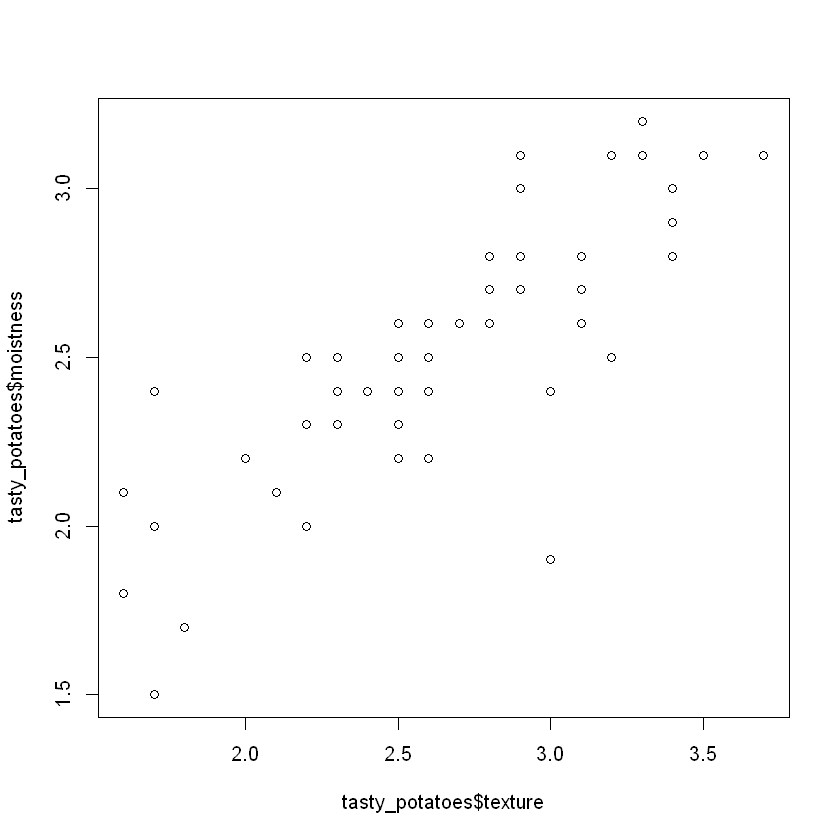

In [44]:
plot(tasty_potatoes$texture,tasty_potatoes$moistness)

In [41]:
tasty_potatoes


[1]  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE
 [13] FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE
 [37] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE
 [73]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [85] FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE
[109]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE
[121] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[133]  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[157] FALSE  TRUE  TRUE FALSE